In [74]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime

import Main
import Regression
import TimeSeries

## Loading data
Loading estimated betas and other data from excel file, using subset from 2011-02-01 because of availability of full data

In [59]:
start = datetime.date(2004,1,1)
end = datetime.date(2017,2,1)
data = Main.pdLoadBetas(start,end)
shortData = data['2011-02-01':]
diffs = shortData.diff()
diffs.rename(columns=lambda x: 'fd_' + x,inplace=True)
shortData = pd.concat([shortData,diffs],axis=1)
print('List of variables: ',shortData.columns)

List of variables:  Index(['CNBrepo', 'CPI', 'EURCZK', 'EURIBOR', 'GovDebt', 'ImpFwd1Y', 'IndProd',
       'Pribor12M', 'PriborSpread', 'RealGDP', 'beta0', 'beta1', 'beta2',
       'cLambda', 'rate_10Y', 'rate_12Y', 'rate_15Y', 'rate_20Y', 'rate_2Y',
       'rate_30Y', 'rate_3Y', 'rate_4Y', 'rate_5Y', 'rate_6Y', 'rate_7Y',
       'rate_8Y', 'rate_9Y', 'y10Yforecast', 'y2Yforecast', 'y3Mforecast',
       'fd_CNBrepo', 'fd_CPI', 'fd_EURCZK', 'fd_EURIBOR', 'fd_GovDebt',
       'fd_ImpFwd1Y', 'fd_IndProd', 'fd_Pribor12M', 'fd_PriborSpread',
       'fd_RealGDP', 'fd_beta0', 'fd_beta1', 'fd_beta2', 'fd_cLambda',
       'fd_rate_10Y', 'fd_rate_12Y', 'fd_rate_15Y', 'fd_rate_20Y',
       'fd_rate_2Y', 'fd_rate_30Y', 'fd_rate_3Y', 'fd_rate_4Y', 'fd_rate_5Y',
       'fd_rate_6Y', 'fd_rate_7Y', 'fd_rate_8Y', 'fd_rate_9Y',
       'fd_y10Yforecast', 'fd_y2Yforecast', 'fd_y3Mforecast'],
      dtype='object')


Plot estimated $\beta_0$

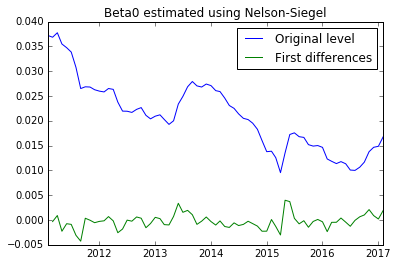

In [46]:
plt.plot(shortData['beta0'],label='Original level')
plt.plot(shortData['fd_beta0'],label='First differences')
plt.legend(loc='best')
plt.title('Beta0 estimated using Nelson-Siegel')

# Regression - $\beta_0$ levels
Estimating $\beta_0$ levels using equations in levels

                            OLS Regression Results                            
Dep. Variable:                  beta0   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     78.83
Date:                Sun, 26 Feb 2017   Prob (F-statistic):           1.18e-18
Time:                        16:38:19   Log-Likelihood:                 306.06
No. Observations:                  73   AIC:                            -606.1
Df Residuals:                      70   BIC:                            -599.2
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        0.0093      0.001      8.563   

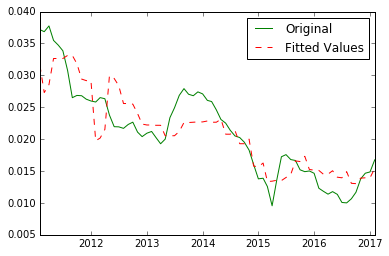

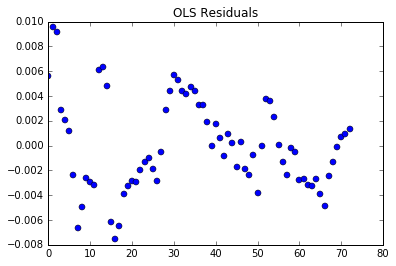

In [58]:
ols = Regression.EstimateOLS(shortData,'beta0 ~ y10Yforecast + CNBrepo')
shortData['b0hat'] = ols.fittedvalues
#print(shortData)
#print(ols.fittedvalues)
plt.figure(1)
plt.plot(shortData['beta0'],'g-',label='Original')
plt.plot(shortData['b0hat'],'r--',label='Fitted Values')
plt.legend(loc='best')
plt.show()
plt.figure(2)
plt.plot(ols.resid,'bo',label='OLS residuals')
#plt.legend(loc='best')
plt.title('OLS Residuals')
plt.show()

# Time series analysis of $\beta_0$
Analyse MA and AR properties of $\beta_0$ - full dataset

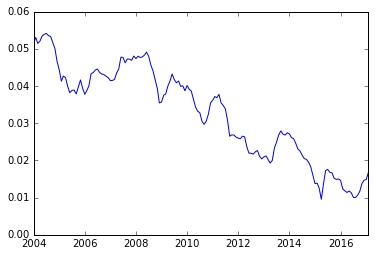

In [61]:
d=data['beta0']
plt.plot(d)

### Original Series

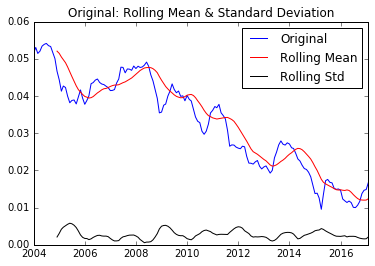

Original: Results of Dickey-Fuller Test:
Test Statistic                  -1.469878
p-value                          0.548356
#Lags Used                       1.000000
Number of Observations Used    156.000000
Critical Value (5%)             -2.880252
Critical Value (10%)            -2.576747
Critical Value (1%)             -3.472979
dtype: float64


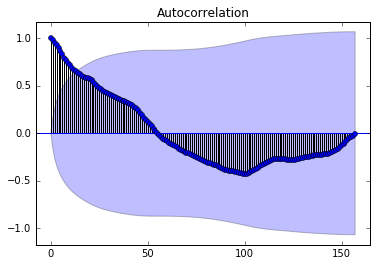

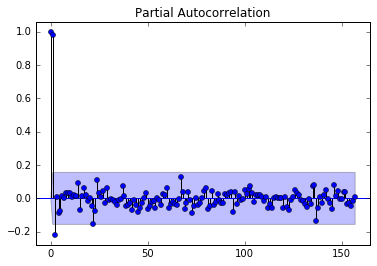

In [65]:
TimeSeries.test_stationarity(d,'Original')
TimeSeries.ACF_analysis(d)

clearly refused

### First Differences:

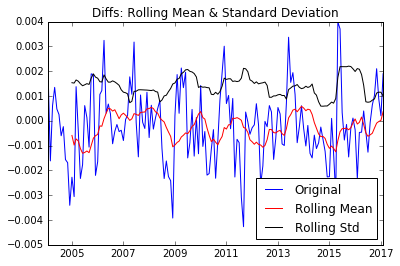

Diffs: Results of Dickey-Fuller Test:
Test Statistic                -8.300482e+00
p-value                        4.030999e-13
#Lags Used                     0.000000e+00
Number of Observations Used    1.560000e+02
Critical Value (5%)           -2.880252e+00
Critical Value (10%)          -2.576747e+00
Critical Value (1%)           -3.472979e+00
dtype: float64


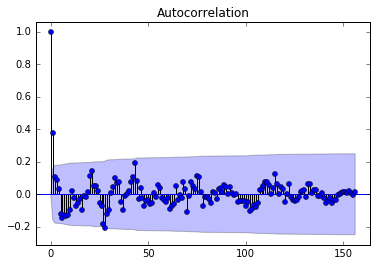

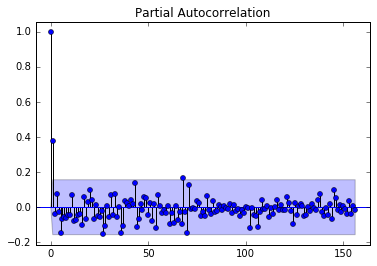

In [67]:
diffs = d.diff()[1:len(d)] 
TimeSeries.test_stationarity(diffs,'Diffs')
TimeSeries.ACF_analysis(diffs)

### LogDiffs:

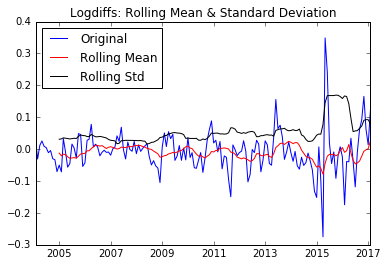

Logdiffs: Results of Dickey-Fuller Test:
Test Statistic                -5.751447e+00
p-value                        5.953480e-07
#Lags Used                     2.000000e+00
Number of Observations Used    1.540000e+02
Critical Value (5%)           -2.880498e+00
Critical Value (10%)          -2.576878e+00
Critical Value (1%)           -3.473543e+00
dtype: float64


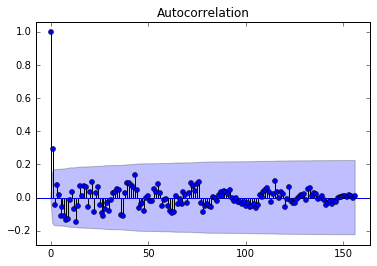

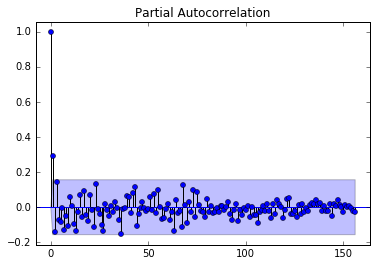

In [71]:
logdiffs = np.log(d).diff()[1:len(d)]
TimeSeries.test_stationarity(logdiffs,'Logdiffs')
TimeSeries.ACF_analysis(logdiffs)

# Fit AR model

changing of breakpoint parameter changes the moment the forecast is applied to

C:\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


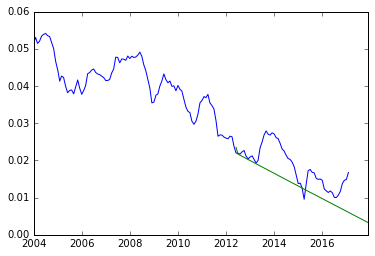

In [80]:
breakpoint = '2012-06-01'
mod = sm.tsa.AR(d[:breakpoint]).fit(maxlag=1,method='cmle')
plt.plot(d)
plt.plot(mod.predict(start=breakpoint,end='2017-12-01'))

### Explaing changes of $\beta_0$